<h2>Twitter API Sentiment Analysis Project</h2>
<h3>Using ROBERTA ML model</h3>

In [1]:
import tweepy
import pandas as pd
import numpy as np

In [2]:
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"
access_token = "your_access_token"
access_token_secret = "your_access_token_secret"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
cursor = tweepy.Cursor(api.user_timeline, user_id='IkoTumangan', tweet_mode="extended").items(1)

In [5]:
#all of the data in the tweet
for i in cursor:
    print(i)

Status(_api=<tweepy.api.API object at 0x000001401D43EE80>, _json={'created_at': 'Sat Jul 02 13:27:09 +0000 2022', 'id': 1543224760674488320, 'id_str': '1543224760674488320', 'full_text': 'Cutting out the Monsters today, apparently sucralose and artificial sugars are culprits for neurological problems. Yikes 😳', 'truncated': False, 'display_text_range': [0, 122], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1526751943804198912, 'id_str': '1526751943804198912', 'name': 'yoiiikotu', 'screen_name': 'IkoTumangan', 'location': 'Irving, Texas', 'description': 'Just a man on a mission… 👾 #data #consulting', 'url': 'https://t.co/L53qDJTwRz', 'entities': {'url': {'urls': [{'url': 'https://t.co/L5

In [6]:
#getting the columns or info about what the data is. getting the field names 
for i in cursor:
    print(dir(i))

In [7]:
#getting the full text from the tweet
for i in cursor:
    print(i.full_text)

In [8]:
#Keyword Search using the hashtag Bitcoin
cursor = tweepy.Cursor(api.search_tweets, q='Bitcoin', tweet_mode="extended").items(1)

for i in cursor:
    tweet = i.full_text
    
print(tweet)

RT @BitcoinMagazine: Banks are closed until Tuesday.

#Bitcoin never takes holidays off.


In [9]:
number_of_tweets = 200
tweets = []
likes = []
time = []

curs = tweepy.Cursor(api.user_timeline, screen_name="IkoTumangan", tweet_mode="extended").items(number_of_tweets)

for w in curs:
    tweets.append(w.full_text)
    likes.append(w.favorite_count)
    time.append(w.created_at)

In [10]:
df = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time})

In [11]:
df

,tweets,likes,time
0,"Cutting out the Monsters today, apparently suc...",0,2022-07-02 13:27:09+00:00
1,@peteswandering Why not,0,2022-07-02 03:45:34+00:00
2,"@BUSHIDOBRYAN Most definitely lmk, let’s grab ...",0,2022-07-02 03:26:08+00:00
3,"@BUSHIDOBRYAN 2 weekends ago, new best friend ...",0,2022-07-02 03:15:07+00:00
4,I_like_lists = [] https://t.co/f5Y3vJDDga,1,2022-07-02 01:50:31+00:00
...,...,...,...
121,@LilyInJapan Dating apps blooooooooow,0,2022-05-21 00:36:23+00:00
122,"I might be crazy.. oh well, see y’all’s at the...",0,2022-05-21 00:08:12+00:00
123,Planning on doing a Twitter sentiment analysis...,0,2022-05-20 22:35:50+00:00
124,Has anyone used an ML algorithm to create sent...,0,2022-05-19 12:46:28+00:00


In [12]:
#Removing retweets
df = df[~df.tweets.str.contains("RT")]

In [13]:
df = df.reset_index(drop=True)

In [14]:
df

,tweets,likes,time
0,"Cutting out the Monsters today, apparently suc...",0,2022-07-02 13:27:09+00:00
1,@peteswandering Why not,0,2022-07-02 03:45:34+00:00
2,"@BUSHIDOBRYAN Most definitely lmk, let’s grab ...",0,2022-07-02 03:26:08+00:00
3,"@BUSHIDOBRYAN 2 weekends ago, new best friend ...",0,2022-07-02 03:15:07+00:00
4,I_like_lists = [] https://t.co/f5Y3vJDDga,1,2022-07-02 01:50:31+00:00
...,...,...,...
117,@LilyInJapan Dating apps blooooooooow,0,2022-05-21 00:36:23+00:00
118,"I might be crazy.. oh well, see y’all’s at the...",0,2022-05-21 00:08:12+00:00
119,Planning on doing a Twitter sentiment analysis...,0,2022-05-20 22:35:50+00:00
120,Has anyone used an ML algorithm to create sent...,0,2022-05-19 12:46:28+00:00


In [15]:
mostlikes = df.loc[df.likes.nlargest(5).index]

In [16]:
mostlikes

,tweets,likes,time
62,"@whoreyess Goes both ways, this is entitlement...",4,2022-06-16 03:41:11+00:00
100,@Haezurath 29 took a data analytics bootcamp a...,4,2022-05-31 00:08:39+00:00
69,"I like seeing everyone’s home set up, here’s m...",3,2022-06-15 22:40:05+00:00
18,I’m planning on getting congruent here across ...,2,2022-06-28 17:54:44+00:00
25,"Trust me, I will never give up on my personal ...",2,2022-06-26 03:38:02+00:00


In [17]:
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns

In [18]:
list_of_sentences = [sentence for sentence in df.tweets]

lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [19]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [20]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [21]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [22]:
df2 = pd.DataFrame(stem2)

df2 = df2[0].value_counts()

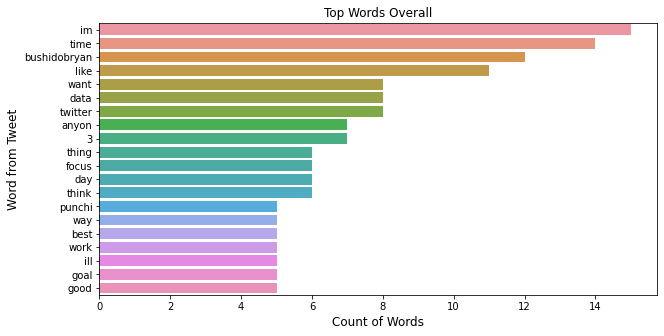

In [23]:
df2 = df2[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x=df2.values, y=df2.index, alpha=1)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [24]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [25]:
str1 = " "
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word', 'Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

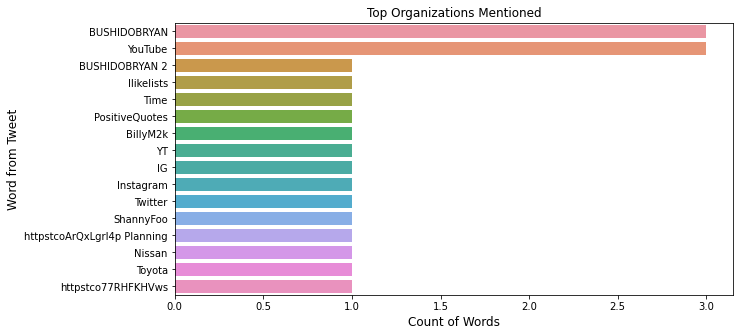

In [26]:
dfx = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x=dfx.values, y=dfx.index, alpha=1)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [27]:
str1 = " "
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word', 'Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

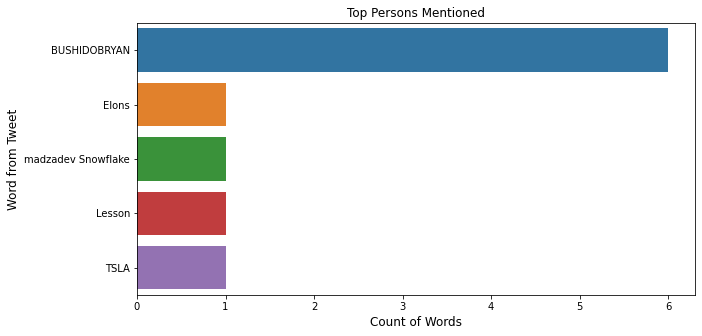

In [28]:
dfy = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(x=dfy.values, y=dfy.index, alpha=1)
plt.title('Top Persons Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [29]:
###make sure you have scipy and transformers downloaded
###using roBERTa ML model which has been created, used, and tested by Meta on 58M tweets

In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [31]:
#grabbing tweet from key word search above 
#turning a tweet into a list of words, removing @usernames mentioned and links, then putting the tweet back together
tweet_words = []
for word in tweet.split(' '):
    if word.startswith('@') and len(word)>1:
        word = '@user'
        
    elif word.startswith('http'):
        word='http'
    tweet_words.append(word)
    
print(tweet_words)

['RT', '@user', 'Banks', 'are', 'closed', 'until', 'Tuesday.\n\n#Bitcoin', 'never', 'takes', 'holidays', 'off.']


In [32]:
tweet_proc = " ".join(tweet_words)
print(tweet_proc)

RT @user Banks are closed until Tuesday.

#Bitcoin never takes holidays off.


In [33]:
#load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

In [34]:
#sentiment analysis
encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
print(encoded_tweet)

{'input_ids': tensor([[    0, 13963,   787, 12105,  7489,    32,  1367,   454,   294,     4,
         50118, 50118, 10431, 42817,   393,  1239,  6875,   160,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [35]:
output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
print(output)

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.3836,  0.9482, -1.4969]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [36]:
###same as above, unpacking encoded_tweet
output = model(**encoded_tweet)
print(output)

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.3836,  0.9482, -1.4969]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [37]:
###converting scores to probabilties between 0 and 1
scores = output[0][0].detach().numpy()
scores = softmax(scores)
print(scores)

[0.3434991  0.6041116  0.05238928]


In [38]:
###print scores
for i in range(len(scores)):
    l = labels[i]
    s = scores[i]
    print(l,s)

Negative 0.3434991
Neutral 0.6041116
Positive 0.05238928


In [39]:
###Let's apply roBERTa to several tweets and take an average of probabilities to see if my tweets so far are generally 
###Negative, Positive, or Neutral
###Grabbing tweets from account

number_of_tweets = 200
tweets = []

curs = tweepy.Cursor(api.user_timeline, screen_name="IkoTumangan", tweet_mode="extended").items(number_of_tweets)

for w in curs:
    tweets.append(w.full_text)
    
df = pd.DataFrame({'tweets':tweets})
df

,tweets
0,"Cutting out the Monsters today, apparently suc..."
1,@peteswandering Why not
2,"@BUSHIDOBRYAN Most definitely lmk, let’s grab ..."
3,"@BUSHIDOBRYAN 2 weekends ago, new best friend ..."
4,I_like_lists = [] https://t.co/f5Y3vJDDga
...,...
121,@LilyInJapan Dating apps blooooooooow
122,"I might be crazy.. oh well, see y’all’s at the..."
123,Planning on doing a Twitter sentiment analysis...
124,Has anyone used an ML algorithm to create sent...


In [40]:
list_of_tweets = list(df['tweets'])
list_of_tweets

['Cutting out the Monsters today, apparently sucralose and artificial sugars are culprits for neurological problems. Yikes 😳',
 '@peteswandering Why not',
 '@BUSHIDOBRYAN Most definitely lmk, let’s grab a bite!',
 '@BUSHIDOBRYAN 2 weekends ago, new best friend for now!',
 'I_like_lists = [] https://t.co/f5Y3vJDDga',
 'Friday vibes.. a walk by the water https://t.co/4ufN8nBzwc',
 '@4r_wines Not sure yet, maybe sight seeing with the pups. Thanks for asking!',
 'I can’t… I’m going to the gym',
 'The caffeine is getting me through lol ready for the long weekend!',
 'My dog sleeps during the day, and keep me up at night. Geez 🙄 https://t.co/EA3LcIkjT0',
 'It’s not about time, it’s about energy. People say they don’t have enough time, translation what they are really saying is they don’t have the physical or mental energy to do something. Really be honest and think about it. Peace',
 'What is your call to action? Why is it important NOW for your customers or clients to take advantage of your

In [41]:
###Version 1 in this model I am using roBERTa to score all the words used in all my tweets 
for tweet in list_of_tweets:
    tweet_words = []
    for word in tweet.split(' '):
        if word.startswith('@') and len(word)>1:
            word = '@user'
        
        elif word.startswith('http'):
            word='http'
        tweet_words.append(word)
    
print(tweet_words)

['Subconsciously', 'and', 'consciously', 'wanting', 'to', 'detox', 'from', 'socials.', 'While', 'starting', 'web', 'scrape', 'project', 'I', 'ended', 'up', 'having', 'to', 'create', 'a', 'Twitter', 'account.', 'It', 'might', 'not', 'be', 'possible', 'to', 'escape', 'the', 'matrix..', '😶', 'http']


In [42]:
tweet_proc = " ".join(tweet_words)
print(tweet_proc)

Subconsciously and consciously wanting to detox from socials. While starting web scrape project I ended up having to create a Twitter account. It might not be possible to escape the matrix.. 😶 http


In [43]:
encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
print(encoded_tweet)

{'input_ids': tensor([[    0, 23055, 22035,   352,     8, 35561,  6923,     7, 31838,    31,
           592,    29,     4,   616,  1158,  3748, 38527,   695,    38,  1249,
            62,   519,     7,  1045,    10,   599,  1316,     4,    85,   429,
            45,    28,   678,     7,  5111,     5, 36173,  7586, 17841, 19002,
          2054,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [44]:
output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
print(output)
print("\n")
###converting scores to probabilties between 0 and 1
scores = output[0][0].detach().numpy()
scores = softmax(scores)
print(scores)
print("\n")
###print scores
for i in range(len(scores)):
    l = labels[i]
    s = scores[i]
    print(l,s)

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.7960,  0.4159, -1.2993]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


[0.55343854 0.37846488 0.06809653]


Negative 0.55343854
Neutral 0.37846488
Positive 0.068096526


In [45]:
###Let's make a wordcloud of my tweets
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys, os
os.chdir(sys.path[0])

text = tweet_proc
stopwords = STOPWORDS

In [47]:
wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    height = 600,
    width = 400
)

wc.generate(text)

wc.to_file('wordcloud_output.png')

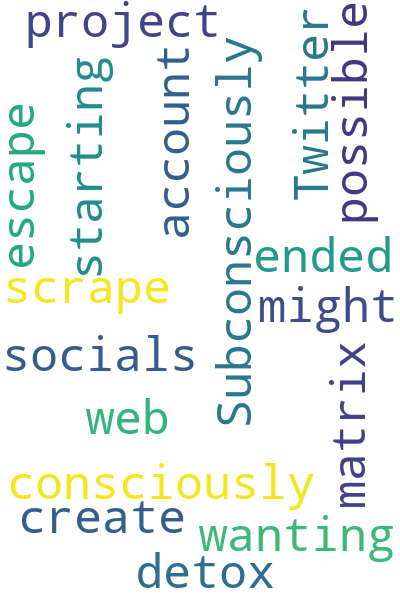

In [1]:
from IPython.display import Image
Image(filename='wordcloud_output.png') 